In [24]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

/var/folders/1_/hgb3xg852md0hqqs3ybwbsp40000gn/T/ipykernel_28735/2412469314.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #стиль отрисовки seaborn


In [25]:
shoppers_data = pd.read_csv('./data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [26]:
print(shoppers_data.shape)

(12330, 18)


In [27]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [28]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


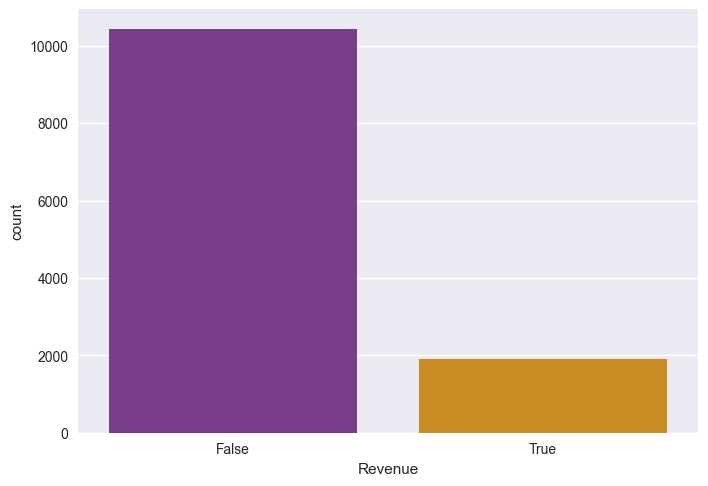

In [29]:
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))

In [30]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

In [31]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [32]:
X_train.shape[0]

9864

In [33]:
X_valid.shape[0]

2466

In [34]:
rf_model = ensemble.RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

skf = model_selection.StratifiedKFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring='f1',
    return_train_score=True
)
cv_metrics


{'fit_time': array([0.56657004, 0.55772185, 0.55419278, 0.56003881, 0.55704498]),
 'score_time': array([0.02129197, 0.02139616, 0.02122116, 0.02095532, 0.02121806]),
 'test_score': array([0.64540338, 0.67636364, 0.65497076, 0.61904762, 0.65441176]),
 'train_score': array([1.        , 0.99959033, 1.        , 1.        , 1.        ])}

In [35]:
print(f'Average f1 test: {np.mean(cv_metrics["test_score"]).round(2)}')
print(f'Average f1 train: {np.mean(cv_metrics["train_score"]).round(2)}')


Average f1 test: 0.65
Average f1 train: 1.0


___

### Task 6.5
Попробуем использовать несколько вариаций случайного леса и с помощью кривых обучения постараемся выбрать наилучшую из них.
Создайте список из трёх следующих моделей:
1. Случайный лес из деревьев максимальной глубины 5.
2. Случайный лес из деревьев максимальной глубины 7.
3. Случайный лес из деревьев максимальной глубины 12.

Для всех трёх моделей количество деревьев в лесу ( n_estimators ) возьмите равным 200, количество объектов в листе ( min_samples_leaf )
5. Параметр random state = 42 . Остальные параметры оставьте по умолчанию.
Постройте для каждой из моделей кривую обучения.

Совет: воспользуйтесь функцией plot_learning_curve() , которую мы создали в юните по кривым обучения.

Для построения кривых используйте обучающий набор данных ( X_train , y_train ), стратифицированный кросс-валидатор на пяти фолдов
(StratifiedKFold ) и метрику Fi-score. Остальные параметры функции learning_curve() оставьте по умолчанию.
Из построенных кривых обучения сделайте вывод: какая глубина деревьев в лесу является оптимальной?


In [36]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

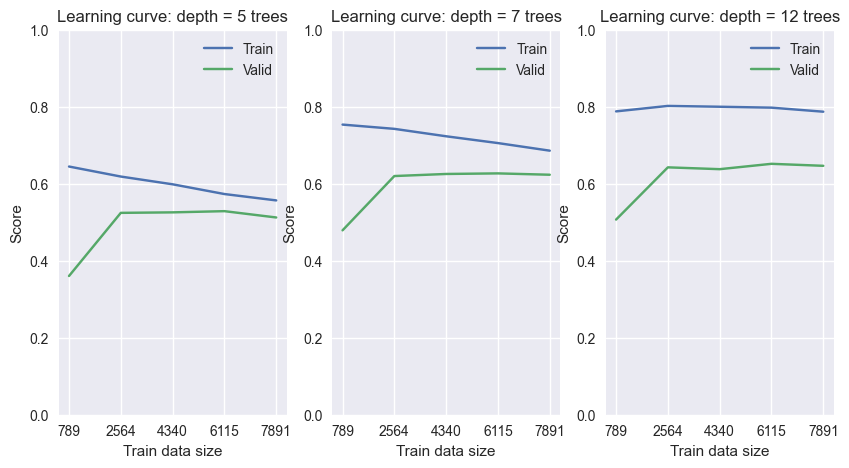

In [37]:
forest_depth = [5, 7, 12]

skf = model_selection.StratifiedKFold(n_splits=5)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, depth in enumerate(forest_depth):
    forest_model = ensemble.RandomForestClassifier(
        n_estimators=200,
        min_samples_leaf=5,
        max_depth=depth,
        random_state=42
    )

    plot_learning_curve(
        model=forest_model, 
        X=X_train,
        y=y_train, 
        cv=skf, 
        ax=axes[i], 
        title=f'depth = {depth} trees')


___

### Task 6.6
Обучите случайный лес с выбранной в предыдущем задании оптимальной глубиной на тренировочной выборке. Сделайте предсказание меток
классов и выведите отчёт о метриках классификации.

In [38]:
forest_model = ensemble.RandomForestClassifier(
        n_estimators=200,
        min_samples_leaf=5,
        max_depth=7,
        random_state=42
    )

forest_model.fit(X_train, y_train)

y_valid_predict = forest_model.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_predict))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



___

### Task 6.7
Попробуем повысить качество распознавания посетителей, совершивших покупку. Используем метод подбора порога вероятности с помощью
PR-кривой.

Порог вероятности будем подбирать с помощью кросс-валидации.

Сделайте предсказание вероятностей принадлежности к пользователям, которые совершат покупку, на кросс-валидации на пяти фолдах.

Используйте метод cross val predict()

Для кросс-валидации используйте случайный лес с подобранной в задании 6.5 максимальной глубиной деревьев, набор данных (параметры
X , у ) - тренировочная выборка ( X_train , y_train ).

Постройте PR-кривую и отметьте на ней точку, в которой наблюдается максимум метрики F для посетителей, которые совершат покупку.

Определите порог вероятности, соответствующий этой точке.

В качестве ответа приведите значение выбранного порога вероятности. Ответ округлите до двух знаков после точки-разделителя.

Best threshold = 0.36, F1-Score = 0.69


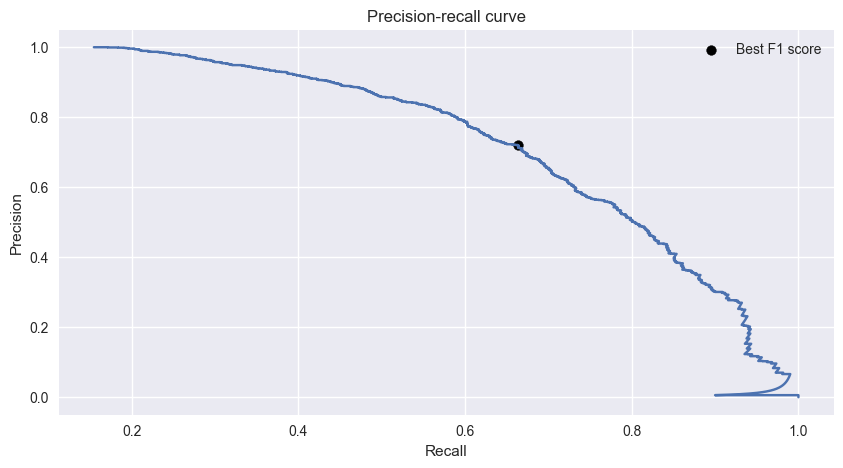

In [39]:
forest_model = ensemble.RandomForestClassifier(
        n_estimators=200,
        min_samples_leaf=5,
        max_depth=7,
        random_state=42
)

forest_model.fit(X_train, y_train)

skf = model_selection.StratifiedKFold(n_splits=5)

y_cv_proba_pred = model_selection.cross_val_predict(
        estimator=forest_model,
        X=X_train,
        y=y_train,
        cv=skf,
        method='predict_proba'        
)[:,1]

precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

f1_scores = (2 * precision * recall) / (precision + recall)

idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(precision, recall)
#Отмечаем точку максимума F1
ax.scatter(precision[idx], recall[idx], marker='o', color='black', label='Best F1 score')
#Даём название графику и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

---

### Задание 6.8
Сделайте предсказание классов объекта с определённым в предыдущем задании порогом вероятности. Выведите отчёт о метриках
классификации.

In [40]:
threshold = thresholds[idx]

In [42]:
y_valid_proba_pred = forest_model.predict_proba(X_valid)[:, 1]
y_valid_pred = (y_valid_proba_pred > threshold).astype('int')
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466

